In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def rk4_step(state, f, t, dt, *args):
    '''
    state: a tuple that include all nodes of each variable.
    f: the specific expression of the equation, the expression of the time derivative.
    dt: time step
    '''

    # k1
    k1 = f(state, t, *args)
    # add dt/2*k1 to each component of state
    state_k1 = tuple(s + 0.5 * dt * k for s, k in zip(state, k1))

    # k2
    k2 = f(state_k1, t + 0.5 * dt, *args)
    # add dt/2*k2 to each component of state
    state_k2 = tuple(s + 0.5 * dt * k for s, k in zip(state, k2))

    # k3
    k3 = f(state_k2, t + 0.5 * dt, *args)
    # add dt * k3 to each component of state
    state_k3 = tuple(s + dt* k for s, k in zip(state, k3))

    # k4
    k4 = f(state_k3, t + dt, *args)

    # update
    new_state = tuple(
        s + (dt/6.0) * (k1_i + 2*k2_i + 2*k3_i + k4_i)
        for s, k1_i, k2_i, k3_i, k4_i in zip(state, k1, k2, k3, k4)
    )

    return new_state

In [26]:
def square_rhombus_coupled_wave_equations(state, t, m1, m2, I1, I2, k, k_theta, theta0, l, dx):
    # u, v, theta are the disp, w, z, phi are the velocity
    u11, w11, u21, w21, u12, w12, u22, w22, v11, z11, v21, z21, v12, z12, v22, z22, theta11, phi11, theta21, phi21, theta12, phi12, theta22, phi22 = state
    N = len(u11) - 1

    du11_dt = np.zeros_like(u11)
    dw11_dt = np.zeros_like(w11)
    du21_dt = np.zeros_like(u21)
    dw21_dt = np.zeros_like(w21)
    du12_dt = np.zeros_like(u12)
    dw12_dt = np.zeros_like(w12)
    du22_dt = np.zeros_like(u22)
    dw22_dt = np.zeros_like(w22)
    dv11_dt = np.zeros_like(v11)
    dz11_dt = np.zeros_like(z11)
    dv21_dt = np.zeros_like(v21)
    dz21_dt = np.zeros_like(z21)
    dv12_dt = np.zeros_like(v12)
    dz12_dt = np.zeros_like(z12)
    dv22_dt = np.zeros_like(v22)
    dz22_dt = np.zeros_like(z22)
    dtheta11_dt = np.zeros_like(theta11)
    dphi11_dt = np.zeros_like(phi11)
    dtheta21_dt = np.zeros_like(theta21)
    dphi21_dt = np.zeros_like(phi21)
    dtheta12_dt = np.zeros_like(theta12)
    dphi12_dt = np.zeros_like(phi12)
    dtheta22_dt = np.zeros_like(theta22)
    dphi22_dt = np.zeros_like(phi22)

    for i in range(1, N):
        du11_dt[i] = w11[i]
        dw11_dt[i] = k / m1 * (u11[i+1] - 2*u11[i] + u11[i-1]) / dx**2  \
                     + (2 * k_theta * theta11[i] * np.cos(theta0) + 2 * (k_theta + k * l**2) * np.sin(theta0)) / l / m1 * (theta11[i+1] - theta11[i-1]) / (2*dx) \
                     + (-2 * k * l * u12[i] + k * l * u21[i] - k_theta * theta21[i] * np.cos(theta0) + k * l**2 * theta21[i] * np.cos(theta0) + k_theta * theta11[i] * theta21[i] * np.sin(theta0)) / l / m1
        du21_dt[i] = w21[i]
        dw21_dt[i] = k / m1 * (u21[i+1] - 2*u21[i] + u21[i-1]) / dx**2  \
                     + (-2 * k_theta * theta21[i] * np.cos(theta0) + 2 * (-k_theta + k * l**2) * np.sin(theta0)) / l / m1 * (theta21[i+1] - theta21[i-1]) / (2*dx) \
                     + (k * l * (u11[i] + u21[i] - 2 * u22[i]) + k_theta * (theta11[i] - theta21[i]) * np.cos(theta0) + k * l**2 * (theta11[i] - theta21[i]) * np.cos(theta0) - k_theta * theta11[i] * theta21[i] * np.sin(theta0)) / l / m1
        dv11_dt[i] = z11[i]
        dz11_dt[i] = k / m1 * (v11[i+1] - 2*v11[i] + v11[i-1]) / dx**2  \
                     + (2 * (k_theta - k * l**2) * np.cos(theta0) - 2 * k_theta * theta11[i] * np.sin(theta0)) / l / m1 * (theta11[i+1] - theta11[i-1]) / (2*dx) \
                     + (-2 * k * l * v12[i] + k * l * v21[i] + k_theta * theta11[i] * theta21[i] * np.cos(theta0) + k_theta * theta21[i] * np.sin(theta0) + k * l**2 * theta21[i] * np.sin(theta0)) / l / m1
        dv21_dt[i] = z21[i]
        dz21_dt[i] = k / m1 * (v21[i+1] - 2*v21[i] + v21[i-1]) / dx**2  \
                     + (2 * (k_theta + k * l**2) * np.cos(theta0) - 2 * k_theta * theta21[i] * np.sin(theta0)) / l / m1 * (theta21[i+1] - theta21[i-1]) / (2*dx) \
                     + (k * l * v11[i] - k * l * v21[i] - 2 * k * l * v22[i] + k_theta * theta11[i] * theta21[i] * np.cos(theta0) + k_theta * theta11[i] * np.sin(theta0) - k_theta * theta21[i] * np.sin(theta0) + k * l**2 * (-theta11[i] + theta21[i]) * np.sin(theta0)) / l / m1
        dtheta11_dt[i] = phi11[i]
        dphi11_dt[i] = - (k_theta - k * l**2 * np.cos(2 * theta0) + k * l**2 * theta11[i] * np.sin(2 * theta0)) / I1 * (theta11[i+1] - 2 * theta11[i] + theta11[i-1]) / dx**2    \
                       - (2 * k * l * theta11[i] * np.cos(theta0) + 2 * k * l * np.sin(theta0)) / I1 * (u11[i+1] - u11[i-1]) / (2*dx) \
                       - (2 * k * l * np.cos(theta0) - 2 * k * l * theta11[i] * np.sin(theta0)) / I1 * (v11[i+1] - v11[i-1]) / (2*dx) \
                       - 1 / I1 * (4 * k * l**2 * theta11[i] + k_theta * (8 * theta11[i] - 2 * theta12[i] + theta21[i]) 
                                   + k * l * (-u21[i] + v21[i] * theta11[i]) * np.cos(theta0) + k * l**2 * (-4 * theta11[i] + 2 * theta12[i] - theta21[i]) * np.cos(2 * theta0)
                                   + k * l * (v21[i] + u21[i] * theta11[i]) * np.sin(theta0) + k * l**2 * (4 * theta11[i]**2 - 2 * theta11[i] * theta12[i] + theta11[i] * theta21[i]) * np.sin(2 * theta0))
        dtheta21_dt[i] = phi21[i]
        dphi21_dt[i] = (-k_theta - k * l**2 * np.cos(2 * theta0) + k * l**2 * theta21[i] * np.sin(2 * theta0)) / I1 * (theta21[i+1] - 2 * theta21[i] + theta21[i-1]) / dx**2 \
                       + (2 * k * l * theta21[i] * np.cos(theta0) + 2 * k * l * np.sin(theta0)) / I1 * (u21[i+1] - u21[i-1]) / (2*dx) \
                       + (-2 * k * l * np.cos(theta0) + 2 * k * l * theta21[i] * np.sin(theta0)) / I1 * (v21[i+1] - v21[i-1]) / (2*dx) \
                       + 1 / I1 * (4 * k * l**2 * theta21[i] - k_theta * (theta11[i] + 9 * theta21[i] -2 * theta22[i]) 
                                   + k * l * (-u11[i] + u21[i] - v11[i] * theta21[i] - v21[i] * theta21[i]) * np.cos(theta0) 
                                   + k * l**2 * (-theta11[i] - 5 * theta21[i] + 2 * theta22[i]) * np.cos(2 * theta0) 
                                   + k * l * (-v11[i] - v21[i] + u11[i] * theta21[i] - u21[i] * theta21[i]) * np.sin(theta0) 
                                   + k * l**2 * (theta11[i] * theta21[i] + 4 * theta21[i]**2 - 2 * theta21[i] * theta22[i]) * np.sin(2 * theta0))
        du12_dt[i] = w12[i]
        dw12_dt[i] = k / m2 * (u12[i+1] - 2 * u12[i] + u12[i-1]) / dx**2    \
                     - 2 * (k_theta * theta12[i] * np.cos(theta0) + (k_theta - k * l**2) * np.sin(theta0)) / l / m2 * (theta12[i+1] - theta12[i-1]) / (2*dx)    \
                     + (-2 * k * u11[i] + 2 * k * u12[i]) / m2
        du22_dt[i] = w22[i]
        dw22_dt[i] = k / m2 * (u22[i+1] - 2 * u22[i] + u22[i-1]) / dx**2    \
                     + 2 * (k_theta * theta22[i] * np.cos(theta0) + (k_theta + k * l**2) * np.sin(theta0)) / l / m2 * (theta22[i+1] - theta22[i-1]) / (2*dx)   \
                     + (-2 * k * u21[i] + 2 * k * u22[i]) / m2
        dv12_dt[i] = z12[i]
        dz12_dt[i] = k / m2 * (v12[i+1] - 2 * v12[i] + v12[i-1]) / dx**2    \
                     + 2 * ((k_theta + k * l**2) * np.cos(theta0) - k_theta * theta12[i] * np.sin(theta0)) / l / m2 * (theta12[i+1] - theta12[i-1]) / (2*dx)    \
                     + (-2 * k * v11[i] + 2 * k * v12[i]) / m2
        dv22_dt[i] = z22[i]
        dz22_dt[i] = k / m2 * (v22[i+1] - 2 * v22[i] + v22[i-1]) / dx**2    \
                     + 2 * ((k_theta - k * l**2) * np.cos(theta0) - k_theta * theta22[i] * np.sin(theta0)) / l / m2 * (theta22[i+1] - theta22[i-1]) / (2*dx)    \
                     + (-2 * k * v21[i] + 2 * k * v22[i]) / m2
        dtheta12_dt[i] = phi12[i]
        dphi12_dt[i] = (-k_theta - k * l**2 * np.cos(2 * theta0) + k * l**2 * theta12[i] * np.sin(2 * theta0)) / I2 * (theta12[i+1] - 2 * theta12[i] + theta12[i-1]) / (dx**2)  \
                       + (2 * k * l * theta12[i] * np.cos(theta0) + 2 * k * l * np.sin(theta0)) / I2 * (u12[i+1] - u12[i-1]) / (2*dx)   \
                       + (-2 * k * l * np.cos(theta0) + 2 * k * l * theta12[i] * np.sin(theta0)) / I2 * (v12[i+1] - v12[i-1]) / (2*dx)  \
                       + (2 * k_theta * theta11[i] - 6 * k_theta * theta12[i] + 2 * k * l**2 * theta12[i]
                          + k * l**2 * (2 * theta11[i] - 4 * theta12[i]) * np.cos(2 * theta0)
                          + k * l**2 * (-2 * theta11[i] * theta12[i] + 4 * theta12[i]**2) * np.sin(2 * theta0)) / I2
        dtheta22_dt[i] = phi22[i]
        dphi22_dt[i] = (-k_theta + k * l**2 * np.cos(2 * theta0) - k * l**2 * theta22[i] * np.sin(2 * theta0)) / I2 * (theta22[i+1] - 2 * theta22[i] + theta22[i-1]) / dx**2    \
                       + (-2 * k * l * theta22[i] * np.cos(theta0) - 2 * k * l * np.sin(theta0)) / I2 * (u22[i+1] - u22[i-1]) / (2*dx)  \
                       + (-2 * k * l * np.cos(theta0) + 2 * k * l * theta22[i] * np.sin(theta0)) / I2 * (v22[i+1] - v22[i-1]) / (2*dx)  \
                       + (2 * k_theta * (theta21[i] - 3 * theta22[i]) - 2 * k * l**2 * theta22[i] + k * l**2 * (-2 * theta21[i] + 4 * theta22[i]) * np.cos(2 * theta0) 
                          + k * l**2 * (2 * theta21[i] * theta22[i] - 4 * theta22[i]**2) * np.sin(2 * theta0)) / I2
        
    du11_dt[0] = 0
    dw11_dt[0] = 0
    du21_dt[0] = 0
    dw21_dt[0] = 0
    du12_dt[0] = 0
    dw12_dt[0] = 0
    du22_dt[0] = 0
    dw22_dt[0] = 0
    dv11_dt[0] = 0
    dz11_dt[0] = 0
    dv21_dt[0] = 0
    dz21_dt[0] = 0
    dv12_dt[0] = 0
    dz12_dt[0] = 0
    dv22_dt[0] = 0
    dz22_dt[0] = 0
    dtheta11_dt[0] = 0
    dphi11_dt[0] = 0
    dtheta21_dt[0] = 0
    dphi21_dt[0] = 0
    dtheta12_dt[0] = 0
    dphi12_dt[0] = 0
    dtheta22_dt[0] = 0
    dphi22_dt[0] = 0
    
    du11_dt[N] = 0
    dw11_dt[N] = 0
    du21_dt[N] = 0
    dw21_dt[N] = 0
    du12_dt[N] = 0
    dw12_dt[N] = 0
    du22_dt[N] = 0
    dw22_dt[N] = 0
    dv11_dt[N] = 0
    dz11_dt[N] = 0
    dv21_dt[N] = 0
    dz21_dt[N] = 0
    dv12_dt[N] = 0
    dz12_dt[N] = 0
    dv22_dt[N] = 0
    dz22_dt[N] = 0
    dtheta11_dt[N] = 0
    dphi11_dt[N] = 0
    dtheta21_dt[N] = 0
    dphi21_dt[N] = 0
    dtheta12_dt[N] = 0
    dphi12_dt[N] = 0
    dtheta22_dt[N] = 0
    dphi22_dt[N] = 0
        
    return (du11_dt, dw11_dt, du21_dt, dw21_dt, du12_dt, dw12_dt, du22_dt, dw22_dt, dv11_dt, dz11_dt, dv21_dt, dz21_dt, dv12_dt, dz12_dt, dv22_dt, dz22_dt, dtheta11_dt, dphi11_dt, dtheta21_dt, dphi21_dt, dtheta12_dt, dphi12_dt, dtheta22_dt, dphi22_dt)
        
                       




C:\Users\dell\AppData\Local\Temp\ipykernel_26456\1977761834.py:34: RuntimeWarning: overflow encountered in scalar multiply
  + (2 * k_theta * theta11[i] * np.cos(theta0) + 2 * (k_theta + k * l**2) * np.sin(theta0)) / l / m1 * (theta11[i+1] - theta11[i-1]) / (2*dx) \
C:\Users\dell\AppData\Local\Temp\ipykernel_26456\1977761834.py:42: RuntimeWarning: overflow encountered in scalar multiply
  + (2 * (k_theta - k * l**2) * np.cos(theta0) - 2 * k_theta * theta11[i] * np.sin(theta0)) / l / m1 * (theta11[i+1] - theta11[i-1]) / (2*dx) \
C:\Users\dell\AppData\Local\Temp\ipykernel_26456\1977761834.py:49: RuntimeWarning: overflow encountered in scalar multiply
  dphi11_dt[i] = - (k_theta - k * l**2 * np.cos(2 * theta0) + k * l**2 * theta11[i] * np.sin(2 * theta0)) / I1 * (theta11[i+1] - 2 * theta11[i] + theta11[i-1]) / dx**2    \
C:\Users\dell\AppData\Local\Temp\ipykernel_26456\1977761834.py:50: RuntimeWarning: overflow encountered in scalar multiply
  - (2 * k * l * theta11[i] * np.cos(theta0) + 

ValueError: not enough values to unpack (expected 12, got 4)

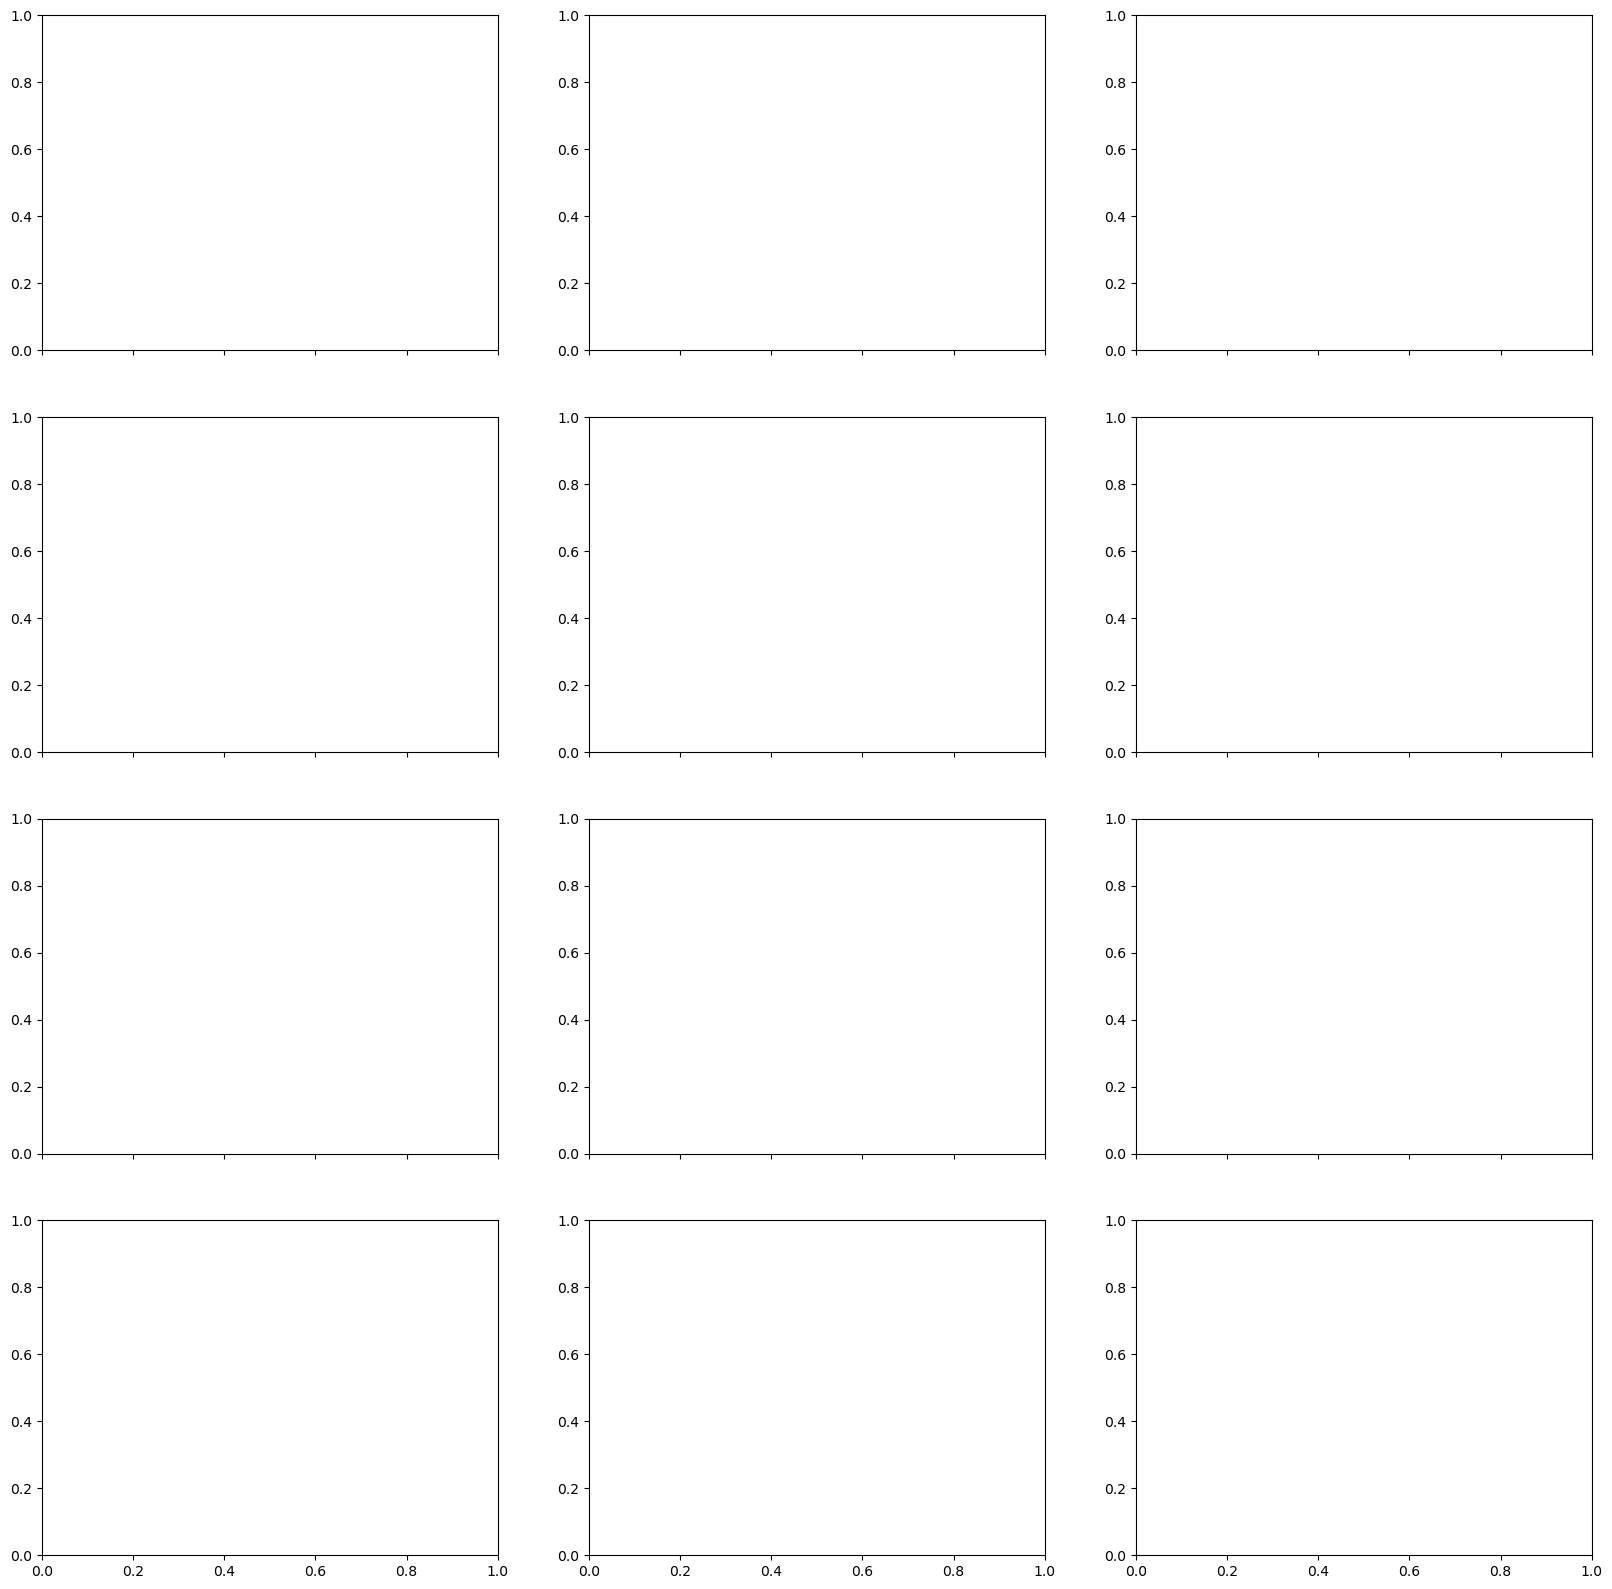

In [39]:
L = 0.1
N = 100
dx = L/N
x = np.linspace(0, L, N+1)

dt = 0.000001
num_steps = 20

m1 = 2.093e-3
m2 = 2.093e-3
I1 = 18.11e-9
I2 = 18.11e-9
k = 19235
k_theta = 0.0427
theta0 = np.pi / 180 * 25
l = 11.e-3 / 2

def left_bc_atan_func(t, amp, freq):
    return amp * np.arctan(2.0 * np.pi * freq * t)
def left_bc_gaussian_func(t, amp, t0, sigma):
    return amp * np.exp( -((t - t0)**2) / (2*sigma**2) )

u11_init = np.zeros_like(x)
w11_init = np.zeros_like(x)
u21_init = np.zeros_like(x)
w21_init = np.zeros_like(x)
u12_init = np.zeros_like(x)
w12_init = np.zeros_like(x)
u22_init = np.zeros_like(x)
w22_init = np.zeros_like(x) 
v11_init = np.zeros_like(x) 
z11_init = np.zeros_like(x) 
v21_init = np.zeros_like(x)
z21_init = np.zeros_like(x)
v12_init = np.zeros_like(x)
z12_init = np.zeros_like(x)
v22_init = np.zeros_like(x)
z22_init = np.zeros_like(x)
theta11_init = np.zeros_like(x)
phi11_init = np.zeros_like(x)
theta21_init = np.zeros_like(x)
phi21_init = np.zeros_like(x)
theta12_init = np.zeros_like(x)
phi12_init = np.zeros_like(x)
theta22_init = np.zeros_like(x)
phi22_init = np.zeros_like(x)

state = (u11_init, w11_init, u21_init,w21_init, u12_init, w12_init, u22_init, w22_init, v11_init, z11_init, v21_init, z21_init, v12_init, z12_init, v22_init, z22_init, theta11_init, phi11_init, theta21_init, phi21_init, theta12_init, phi12_init, theta22_init, phi22_init)

snapshots_u11 = []
snapshots_u21 = []
snapshots_u12 = []
snapshots_u22 = []
snapshots_v11 = []
snapshots_v21 = []
snapshots_v12 = []
snapshots_v22 = []
snapshots_theta11 = []
snapshots_theta21 = []
snapshots_theta12 = []
snapshots_theta22 = []

store_interval = 20

current_time = 0.0

for step in range(num_steps):

    u11, w11, u21, w21, u12, w12, u22, w22, v11, z11, v21, z21, v12, z12, v22, z22, theta11, phi11, theta21, phi21, theta12, phi12, theta22, phi22 = state
    u11[0] = left_bc_atan_func(t=current_time, amp = 0.0004, freq = 10)
    w11[0] = left_bc_gaussian_func(t=current_time, amp = 0.00, t0=2.5e-3, sigma=500)
    theta11[0] = 0
    phi11[0] = 0
    state = (u11, w11, u21, w21, u12, w12, u22, w22, v11, z11, v21, z21, v12, z12, v22, z22, theta11, phi11, theta21, phi21, theta12, phi12, theta22, phi22)
    state = rk4_step(state, square_rhombus_coupled_wave_equations, current_time, dt, m1, m2, I1, I2, k, k_theta, theta0, l, dx)

    current_time += dt

    if step % store_interval == 0:
        (u11_snap, w11_snap, u21_snap, w21_snap, u12_snap, w12_snap, u22_snap, w22_snap, v11_snap, z11_snap, v21_snap, z21_snap, v12_snap, z12_snap, v22_snap, z22_snap, theta11_snap, phi11_snap, theta21_snap, phi21_snap, theta12_snap, phi12_snap, theta22_snap, phi22_snap) = state
        snapshots_u11.append(u11_snap.copy())
        snapshots_u21.append(u21_snap.copy())
        snapshots_u12.append(u12_snap.copy())
        snapshots_u22.append(u22_snap.copy())
        snapshots_v11.append(v11_snap.copy())
        snapshots_v21.append(v21_snap.copy())
        snapshots_v12.append(v12_snap.copy())
        snapshots_v22.append(v22_snap.copy())
        snapshots_theta11.append(theta11_snap.copy())
        snapshots_theta21.append(theta21_snap.copy())
        snapshots_theta12.append(theta12_snap.copy())
        snapshots_theta22.append(theta22_snap.copy())

fig, (axu11, axu21, axu12, axu22, axv11, axv21, axv12, axv22, axtheta11, axtheta21, axtheta12, axtheta22) = plt.subplots(4, 3, figsize=(20, 20), sharex=True)

axu11.set_xlim(0, L)
axu11.set_ylim(-0.05, 0.05)
axu11.set_ylabel(r"$$u_{11}(x, t)$$")
axu11.set_title("square rhombus wave equation")

def animate(frame_idx):
    axu11.set_title(f"square rhombus wave equation (Frame {frame_idx}/{len(snapshots_u11)-1})")

ani = animation.FuncAnimation(
    fig, animate, frames=len(snapshots_u11), interval=50, blit=True
)

ani.save("square_rhombus_block_wave.gif", writer='pillow', fps=20)

plt.show()